# ***THIS NOTEBOOK USES A NEURAL NETWORK TO REPRODUCE A GAUSSIAN CURVE AND THEN COMPUTE DERIVATES (first and sec) OF THE GAUSS. CURVE AND OF THE REPRODUCTION***
---
---
---
---
---

# IMPORTS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
from keras import layers, models, optimizers

# COMPUTING DERIVATIVES

*   f'(x) = [ f(x+h) - f(x) ] / h
*   f''(x) = [ f(x+h) + f(x-h) - 2f(x) ] / h*h

In [16]:
##########
#SECTION : FUNCTION DEFINITION
##########

#computes the first derivative of a function
def first_der (x,h,f1,f2):
    der = (f1-f2)/h
    return der
#computes the second derivative of a function
def sec_der (x,h,f1,f2,f3):
    der = (f1+f3-2*f2)/(h**2)
    return der



##########
#SECTION : REPRODUCING A GAUSSIAN CURVE
##########
pts=1000
linx = np.linspace (-5.,5.,pts)
h = 10/pts
lst = range(0,pts)
norm = norm.pdf(linx) #gaussian curve


model = models.Sequential([
    layers.Dense(200, input_shape=(1,), activation='relu'),
    layers.Dense(200, input_shape=(1,), activation='relu'),    
    layers.Dense(1), # no activation -> linear function of the input
])
model.summary()
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.fit(linx, norm, epochs=45, batch_size=50,verbose=0)
predictions = model.predict(linx)
preds = predictions.reshape(-1)








############
#SECTION : COMPUTING DERIVATIVES
############
y1 = np.zeros_like(lst, dtype=float) #first derivative of gaussian curve
y2 = np.zeros_like(lst, dtype=float) #second derivative of gaussian curve
y3 = np.zeros_like(lst, dtype=float) #first derivative of network approximation
y4 = np.zeros_like(lst, dtype=float) #second derivative of network approximation

x=-5. #computing from -5 to 5
for i in range(1,999) :
    # derivees de norm
    y1 [i] = first_der(x,h,norm[i+1],norm[i])
    y2 [i] = sec_der(x,h,norm[i+1],norm[i],norm[i-1])  
    #derivees de preds
    y3 [i] = first_der(x,h,preds[i+1],preds[i])
    y4 [i] = sec_der(x,h,preds[i+1],preds[i],preds[i-1])
  
    x+=h

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_31 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


# PLOT

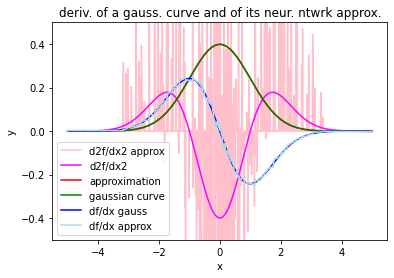

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("deriv. of a gauss. curve and of its neur. ntwrk approx.")    
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.ylim(-0.5,0.5)

plt.plot(linx,y4, c='pink', label='d2f/dx2 approx')
plt.plot(linx,y2, c='magenta', label='d2f/dx2')
plt.plot(linx, preds2,c='r', label = 'approximation')
plt.plot(linx,norm, c= 'g', label='gaussian curve')
plt.plot(linx,y1, c='b',label='df/dx gauss')
plt.plot(linx,y3, c='lightblue',label='df/dx approx')

leg = plt.legend()
plt.savefig('derivative.pdf')